## Table of Contents <a id="toc">

* [Other Investigations](#other)

## Initial Imports

In [3]:
import pandas as pd
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('poster')
%matplotlib inline

In [15]:
pwd

'/home/matt/Documents/Projects/WebDev/CoronaVirus'

## Reload

In [7]:
dir_ = '/home/matt/Documents/Projects/WebDev/mmitchell_net/FlaskApp/static/data/'
yesterday = datetime.now()-timedelta(1)
filename = 'Confirmed_Cases_through_{}.csv'.format(yesterday.strftime('%b%d'))
transformed = pd.read_csv(dir_+filename)
transformed.head()

,Province/State,Country/Region,Lat,Long,ConfirmedCases,Date
0,NaN,Thailand,15.0000,101.0000,2,2020-01-22
1,NaN,Japan,36.0000,138.0000,2,2020-01-22
2,NaN,Singapore,1.2833,103.8333,0,2020-01-22
3,NaN,Nepal,28.1667,84.2500,0,2020-01-22
4,NaN,Malaysia,2.5000,112.5000,0,2020-01-22


## Line Chart

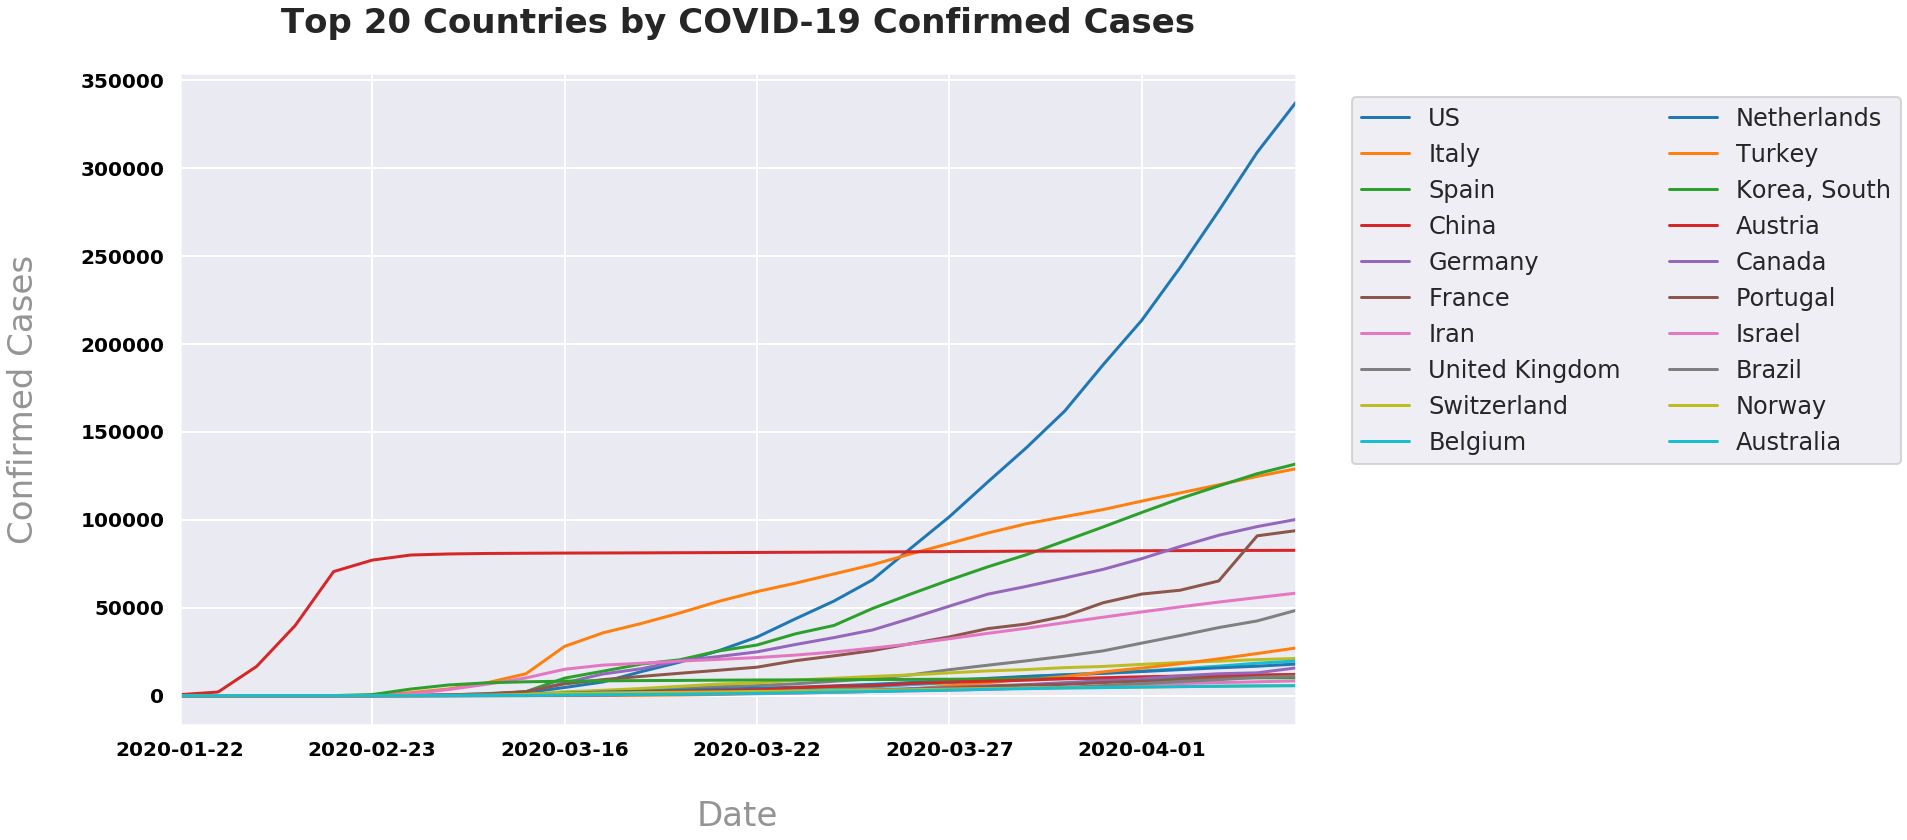

In [16]:
# byCountry = df.groupby('Country/Region')[dates].sum().transpose()
current = transformed[transformed['Date']=='2020-03-30']
curCountryTotals = current.groupby(['Country/Region'])['ConfirmedCases'].sum()
# top_25=byCountry.max().sort_values(ascending=False)[:20].index
top_10=curCountryTotals.sort_values(ascending=False)[:20].index

#If Country Total Exists, Remove BreakOuts
grouped = transformed.groupby(['Country/Region', 'Date'])['ConfirmedCases'].sum().reset_index()
byCountry = grouped.pivot(columns='Country/Region', index='Date', values='ConfirmedCases')
byCountry.at['2020-03-23', 'France'] = 19874 #Manually Fix France
byCountry[top_10].plot(kind='line', figsize=(20,12))
plt.legend(loc=(1.05,.4), fontsize='24', ncol=2)
plt.title("Top 20 Countries by COVID-19 Confirmed Cases", fontsize=34, weight='bold', pad=40)

plt.xticks(fontsize=20, color="black", weight='bold')
plt.yticks(fontsize=20, color="black", weight='bold');
plt.ylabel("Confirmed Cases", fontsize=34, labelpad=40, color='#949494')
plt.xlabel("Date", fontsize=34, labelpad=40, color='#949494')
filename = 'Line_Chart_by_Country_{}.png'.format(yesterday.strftime('%b%d'))
plt.savefig(filename, transparent=True, bbox_inches='tight')

## Other Investigations <a id="other">

[Table of Contents](#toc)

Text(0.5, 0, 'Date')

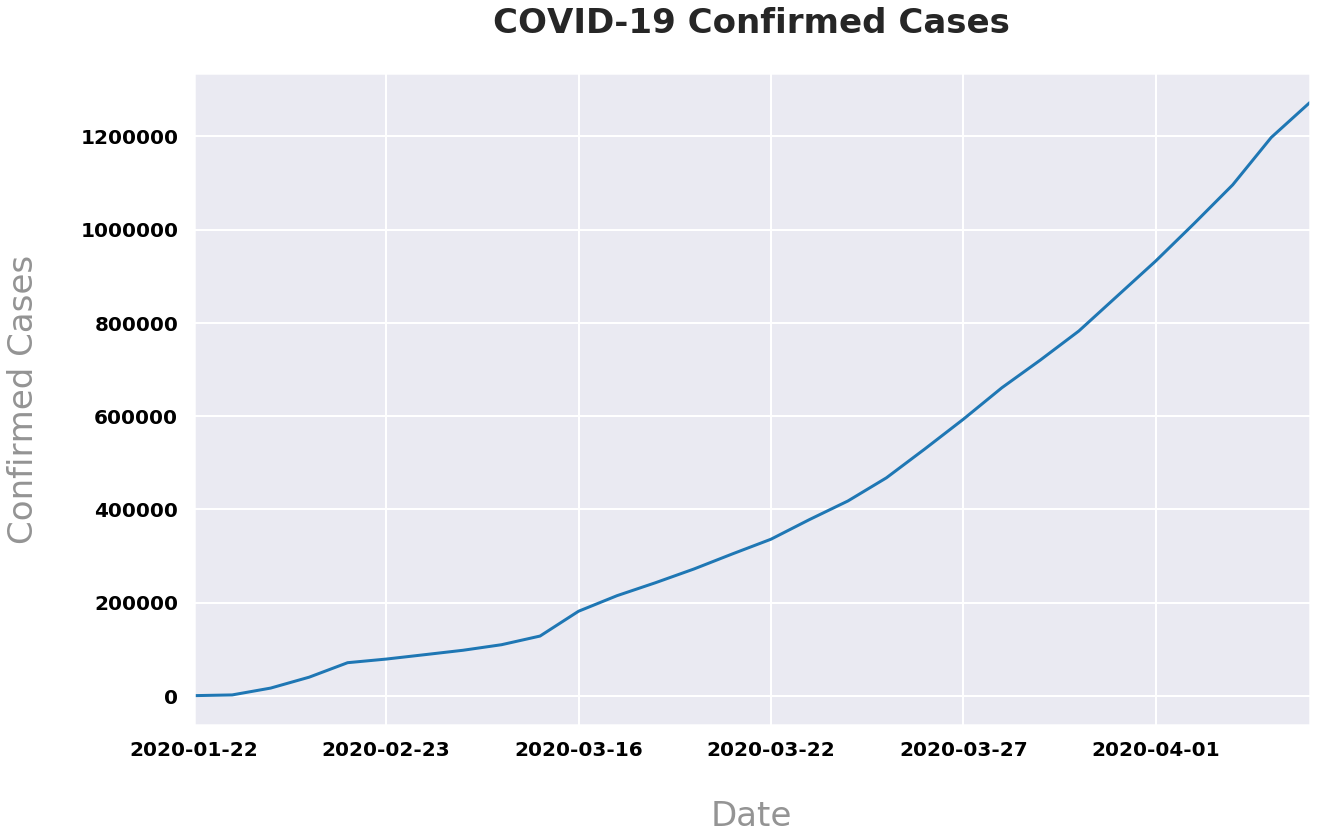

In [17]:
byCountry.transpose().sum().plot(figsize=(20,12))
plt.title("COVID-19 Confirmed Cases", fontsize=34, weight='bold', pad=40)
plt.xticks(fontsize=20, color="black", weight='bold')
plt.yticks(fontsize=20, color="black", weight='bold');
plt.ylabel("Confirmed Cases", fontsize=34, labelpad=40, color='#949494')
plt.xlabel("Date", fontsize=34, labelpad=40, color='#949494')

In [9]:
tot = 67800
Deaths =  3144
Recovered =  59433 
print(Recovered/tot)
print(Deaths/Recovered)

0.8765929203539823
0.05289990409368533


In [7]:
5476 / 59138

0.09259697656329263

In [1]:
# df['Province/State'].value_counts()

## Test Data

In [54]:
response = requests.get('https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/testing-in-us.html')
test = pd.read_html(response.content)[0]

In [55]:
test.tail()

,Date Collected,CDC Labs,US Public Health Labs
62,3/20,11‡,5883
63,3/21,32‡,3280§
64,3/22,1‡,2048§
65,3/23,‡,738§
66,3/24,‡,10§


In [56]:
test.head()

,Date Collected,CDC Labs,US Public Health Labs
0,1/18,4,0
1,1/19,0,0
2,1/20,7,0
3,1/21,3,0
4,1/22,10,0


In [57]:
test.tail()

,Date Collected,CDC Labs,US Public Health Labs
62,3/20,11‡,5883
63,3/21,32‡,3280§
64,3/22,1‡,2048§
65,3/23,‡,738§
66,3/24,‡,10§


In [61]:
# test['US Public Health Labs'] = test['US Public Health Labs'].str.replace('§','').astype(int)
# test['CDC Labs'] = test['CDC Labs'].str.replace('‡','').map(lambda x: 0 if x=='' else x).astype(int)
test['Total Labs'] = test[['CDC Labs', 'US Public Health Labs']].sum(axis=1)
test.head()


,Date Collected,CDC Labs,US Public Health Labs,Total Labs
0,1/18,4,0,4
1,1/19,0,0,0
2,1/20,7,0,7
3,1/21,3,0,3
4,1/22,10,0,10


In [62]:
test.tail()

,Date Collected,CDC Labs,US Public Health Labs,Total Labs
62,3/20,11,5883,5894
63,3/21,32,3280,3312
64,3/22,1,2048,2049
65,3/23,0,738,738
66,3/24,0,10,10


In [94]:
def modify_date_format(date):
    monthDay = date.split('/')
    month = monthDay[0]
    day = monthDay[1]
    month = int(month)
    day = int(day)
    if month < 10:
        month = '0'+str(month)
    if day < 10:
        day = '0'+str(day)
    return '2020-{}-{}'.format(month,day)
        

In [96]:
test['Date Collected'] = test['Date Collected'].map(modify_date_format)

In [99]:
test['Cumulative Total Labs'] = test['Total Labs'].cumsum()

In [97]:
set(test['Date Collected'].unique()).intersection(set(transformed.Date.unique()))

{'2020-01-22',
 '2020-01-26',
 '2020-02-02',
 '2020-02-09',
 '2020-02-16',
 '2020-02-23',
 '2020-03-01',
 '2020-03-05',
 '2020-03-08',
 '2020-03-12',
 '2020-03-16',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22'}

In [102]:
test= test.rename({'Date Collected':'Date'}, axis=1)

In [117]:
test.head()

,Date,CDC Labs,US Public Health Labs,Total Labs,Cumulative Total Labs
0,2020-01-18,4,0,4,4
1,2020-01-19,0,0,0,4
2,2020-01-20,7,0,7,11
3,2020-01-21,3,0,3,14
4,2020-01-22,10,0,10,24


In [118]:
test.tail()

,Date,CDC Labs,US Public Health Labs,Total Labs,Cumulative Total Labs
62,2020-03-20,11,5883,5894,88405
63,2020-03-21,32,3280,3312,91717
64,2020-03-22,1,2048,2049,93766
65,2020-03-23,0,738,738,94504
66,2020-03-24,0,10,10,94514


In [114]:
testVsConfirmed = pd.merge(test, us)
testVsConfirmed.head()

,Date,CDC Labs,US Public Health Labs,Total Labs,Cumulative Total Labs,ConfirmedCases
0,2020-01-22,10,0,10,24,1
1,2020-01-26,79,0,79,293,5
2,2020-02-02,33,0,33,1199,8
3,2020-02-09,36,2,38,1816,11
4,2020-02-16,24,1,25,2176,13


In [124]:
testVsConfirmed['New Cases'] = testVsConfirmed.ConfirmedCases.diff()

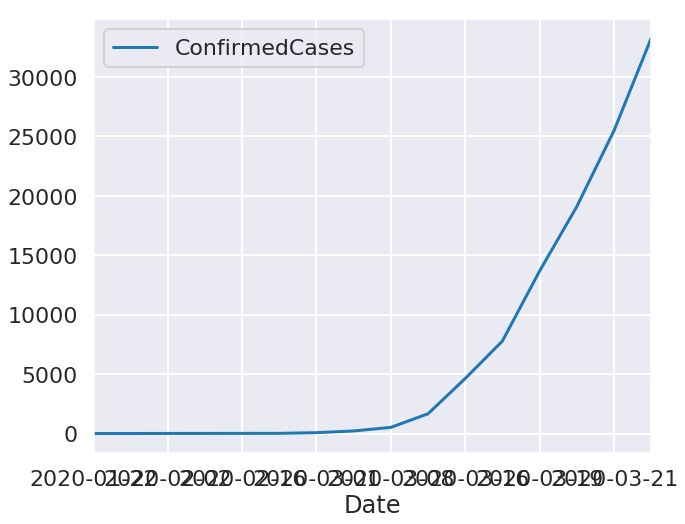

In [128]:
testVsConfirmed.plot('Date', 'ConfirmedCases', figsize=(10,8))

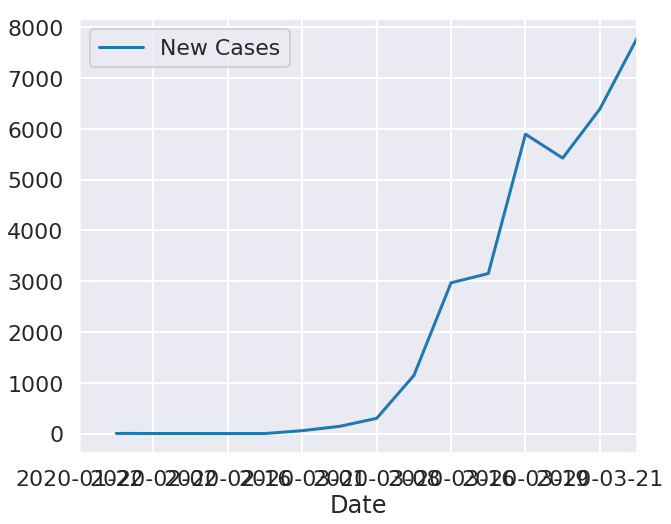

In [127]:
testVsConfirmed.plot('Date', 'New Cases', figsize=(10,8))

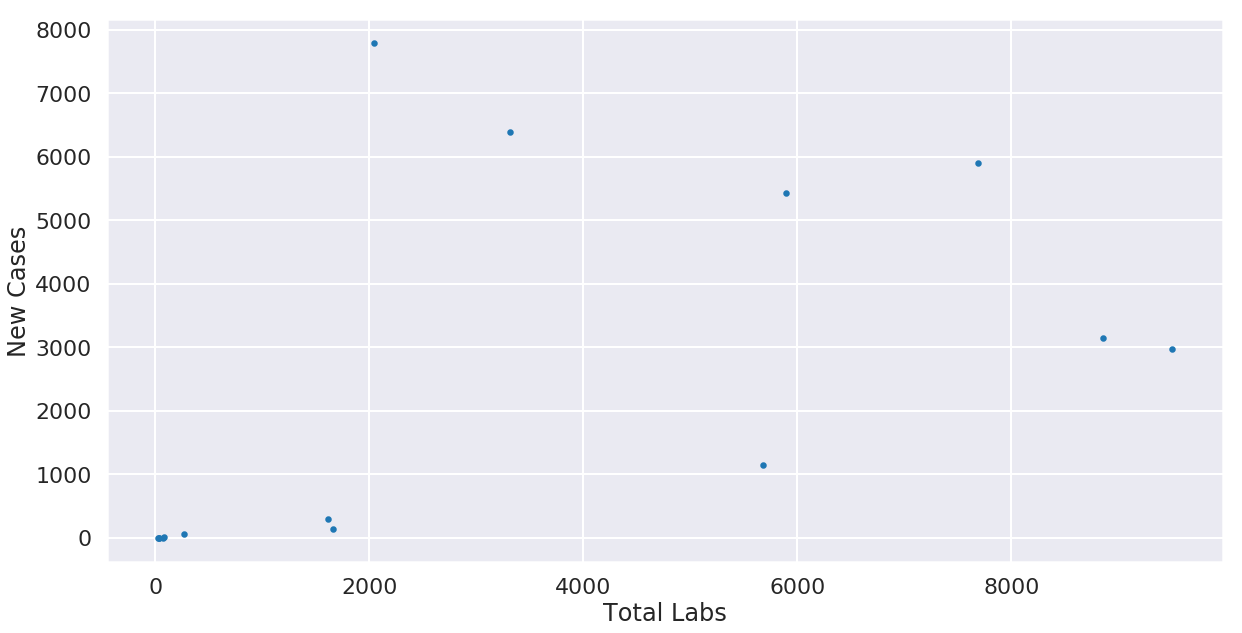

In [125]:
testVsConfirmed.plot('Total Labs', 'New Cases', kind='scatter', figsize=(20,10))

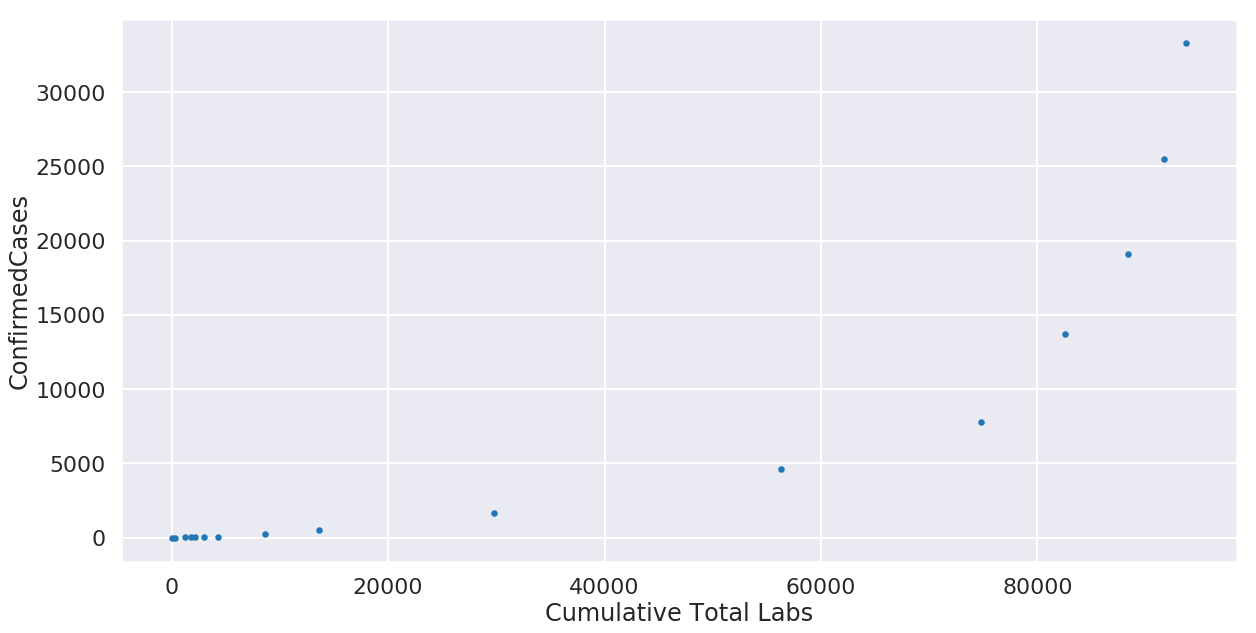

In [116]:
testVsConfirmed.plot('Cumulative Total Labs', 'ConfirmedCases', kind='scatter', figsize=(20,10))

plt.plot()

In [79]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [113]:
us = transformed[transformed['Country/Region']=='US']
us = us.groupby('Date')['ConfirmedCases'].sum().reset_index()
us.head()

,Date,ConfirmedCases
0,2020-01-22,1
1,2020-01-26,5
2,2020-02-02,8
3,2020-02-09,11
4,2020-02-16,13
